# 2017-18 Drop and Go Usage Stats
### Regina Vic East
<br>
Welcome! As you may know, I am a nerd. I do nerdy stuff all the time, and this is just one of those examples. 

You might also know, that I am a huge fan of the Drop and Go. Love it. 

Pretty much what I am doing here is just joining those two things. I am using python and the Pandas module to breakdown this past years (which was the inaugural dng year) Drop and Go usage. I don't know how *useful* this information will be, but it is interesting nonetheless.  Actually, I think it will be pretty useful, too. It shows what type of customers use the Drop and Go, and it will let us know how succesful our first year was.
***
<br>
##### What are you really looking at?
<br>
The way these notebooks work is that it is made up of 'cells'.  Some are just text, such as this one. Others run code. The code cells have 'input': `In [x]:` *(x is the order in which they were run, no need to pay attention to that)* and directly under the input cell will be the output, if there is any. I have it set up to hide all this crap so it's easier to read. If you want to nerd-out and check out the code that makes all the graphs and stuff, click on `Show me that Code!` below.
<br>
<br>
What I did was created a csv of all of the Drop and Go payments from April 1st, 2017 to March 31st, 2018 (if you want to see how I did that look at <a href='https://github.com/nglhubbrich/dngCustomerStats/blob/master/README.md'>this</a>). I use that csv data here to pull out and play with certain information. First I'll check out some of the payment stats (average payment, largest payment, payment spread). And then I wanna do some stuff on the customer visits. To be honest, I started this whole thing because I was interested in finding out the 'Bounce Rate'. In web stats, the Bounce Rate is the amount of people that visited your landing (home) page and then just peaced out. I wanted to find out the ratio of people who *use* the Drop and Go and the amount of people who *tried* the Drop and Go. So, I'll do that. There'll be some other stuff along the way, and I'll try to narrate my thought process and what is happening as I go along, with a text cell. Anything pertaining to the code (if you show it) will have a comment *(`# comments look like this`)*. Hopefully it doesn't get too disjointed and attention-deficity. No promises.
<br>
***
<br>
So, if I haven't already bored you away from this notebook- continue on and hope you enjoy!

In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show me that Code!"></form>''')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

## Boring stuff to start...
<font color=skyblue>This is for you fellow nerds out there. Just some version data of what I'm using</font>

In [3]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Seaborn version ' + sns.__version__)

Python version 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.22.0
Matplotlib version 2.1.2
Seaborn version 0.8.1


## Load our csv 

<font color=skyblue>Bring it on!!-err, I mean in! Just bringing in the dng csv. df stands for dataFrame, its just convention to name it that in pandas, and ultimately, it is not important. It will change as the dataFrame changes</font>

In [4]:
df = pd.read_csv('paymentStats.csv')
# see what that data looks like
df

,Date,Account Number,Account Name,Payment Amount
0,4/3/2017,96100030,Andrew Davis,4.60
1,4/3/2017,999000103,Jody Herperger,61.23
2,4/5/2017,999000246,Robert Eering,40.69
3,4/6/2017,999000269,Colin Beaton,27.65
4,4/7/2017,88100011,Archie stewart,55.85
5,4/7/2017,96100050,Cindy Kerth,123.65
6,4/10/2017,96100012,Kim Peters,4.75
7,4/10/2017,999000114,Leslie Pasnak,66.95
8,4/10/2017,999000711,Karen Oblinski,30.10
9,4/12/2017,96100051,heather dodds,19.10


In [5]:
totalDrops = df['Payment Amount'].count()
# how many total drop offs did we have?
totalDrops

1286

<font color=skyblue>Woof! That's not bad. For interest sake, that is about 2% of our total customers. More about that in a bit, I just wanted to set up that totalDrops variable so we could use it later</font>

## Dolla Dolla Bills, Y'all!!
***
#### all about that chedda

<font color=skyblue>So, let's start easy. What was the largest Drop and Go refund?</font>

In [6]:
# sort by payments, biggest first
biggestDNG = df.sort_values(["Payment Amount"], ascending=False)
# show me number ONE!
biggestDNG.head(1)

,Date,Account Number,Account Name,Payment Amount
634,11/7/2017,999002867,Joey Deck,1105.65


<font color=skyblue>Hey, hey! Atta boy, Joey!! So, that is kind of cool, but that could be a one off. It would be better to see the average payment per customer.</font>

In [7]:
# make an account name group with some mean payment info
meanPayPerPeep = df.groupby('Account Name')['Payment Amount'].mean().round(2).reset_index()
# lets just take a look at the team leaders
meanPayPerPeep.sort_values(['Payment Amount'], ascending=False).head(15)

,Account Name,Payment Amount
178,Joey Deck,667.25
337,Tanya Eberts,578.45
369,alvin antiquiera,479.85
510,sarah brooker,426.95
473,lori vanwoert,348.67
312,Scott Croissant,282.35
130,Haley Seitz,258.85
407,darcy riegel,258.40
352,U17Saskatoon Soccer,241.40
524,stephanie kelln,207.95


<font color=skyblue>Cool beans! There is some decent info. Looks like there a quite a few big...well, not spenders...whatever, you know what I mean. But there is a pretty steep drop off, there is a 500 difference between 1 and 15 (there are a lot more rows than that, i just brought up the first 15). Not surprisingly, I think there is going to be a pretty significant range of payments, and I don't think this represents the *average* order, so, let's take a look at the spread.</font>

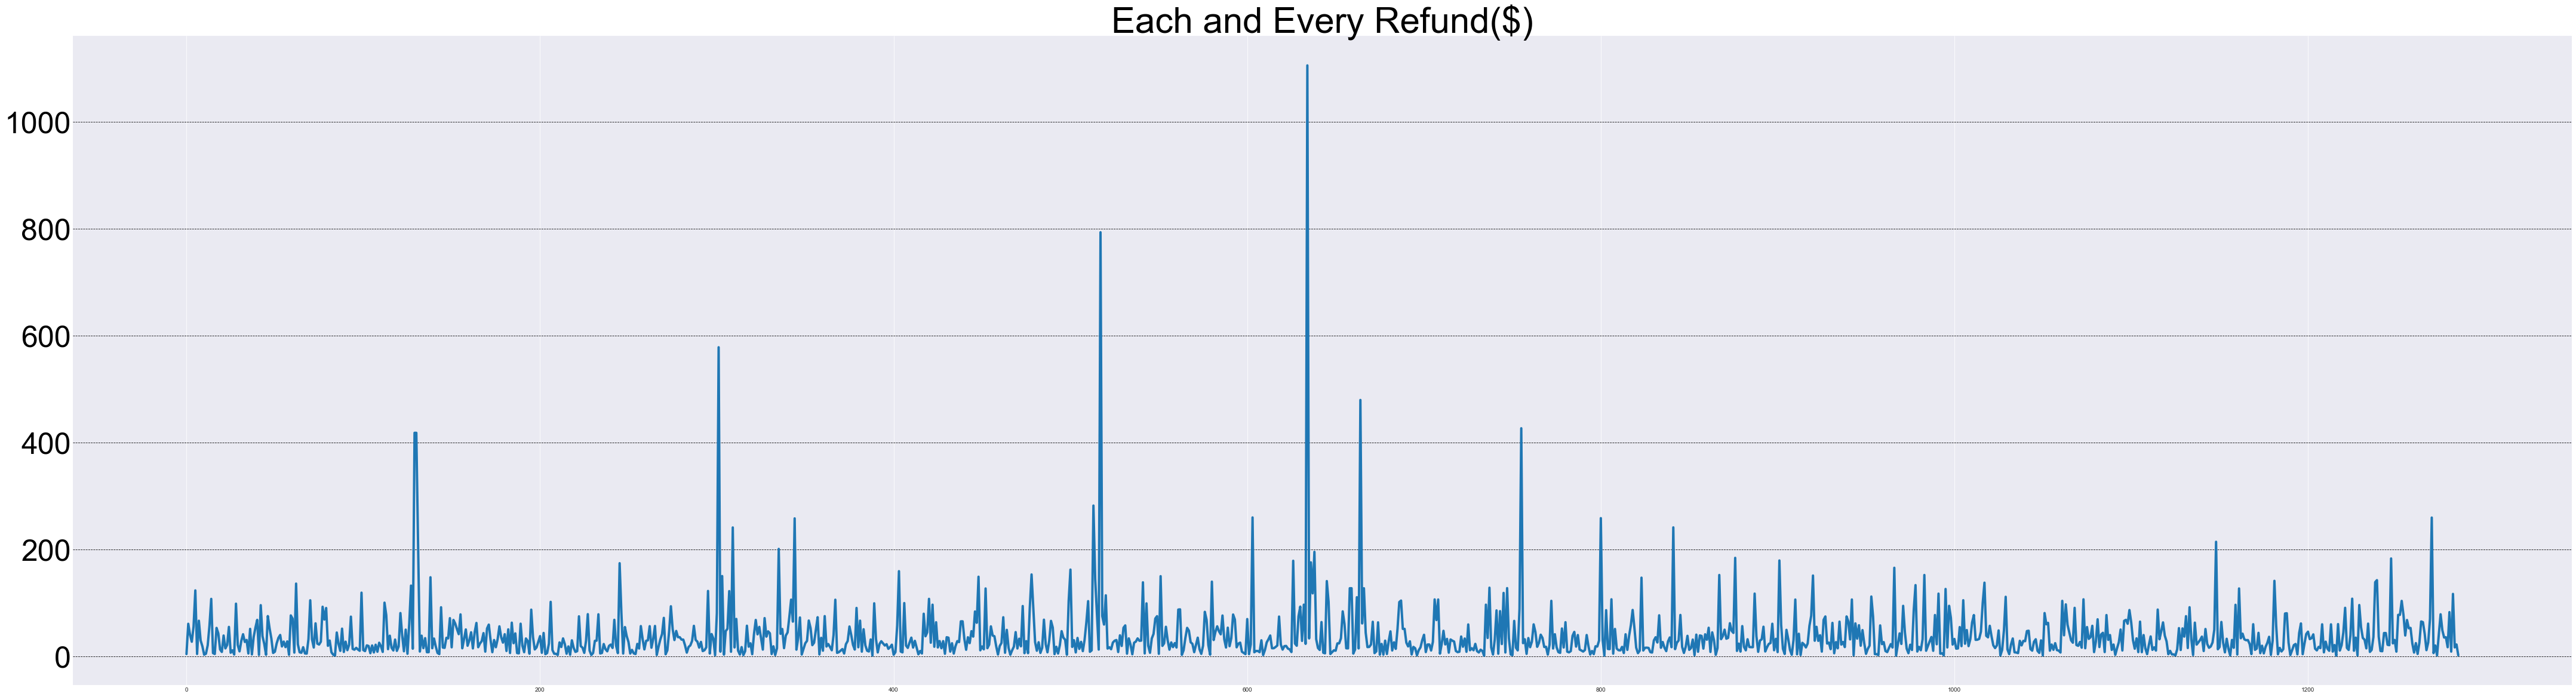

In [8]:
paymentSpread = df['Payment Amount'].plot.line(figsize=(75,20), lw=4, legend=False)
paymentSpread.set_title('Each and Every Refund($)', fontsize=60, color='black')
paymentSpread.tick_params(axis='y', labelsize=50, colors='black')
paymentSpread.grid(axis='y', which='major', color='black', linestyle='--')

<font color=skyblue>Okie Dokie, there we go. So, that is every single payment we made through the ding and it looks kind of like you would imagine: some big ones, but mostly your normal orders. (hahaha I just noticed my typo and not only am I leaving it, I'm going to start calling it that from now on, haha!) and it looks messy cause of all the data points, and we're more interested in the trends so let's just look at each persons average drop.</font>

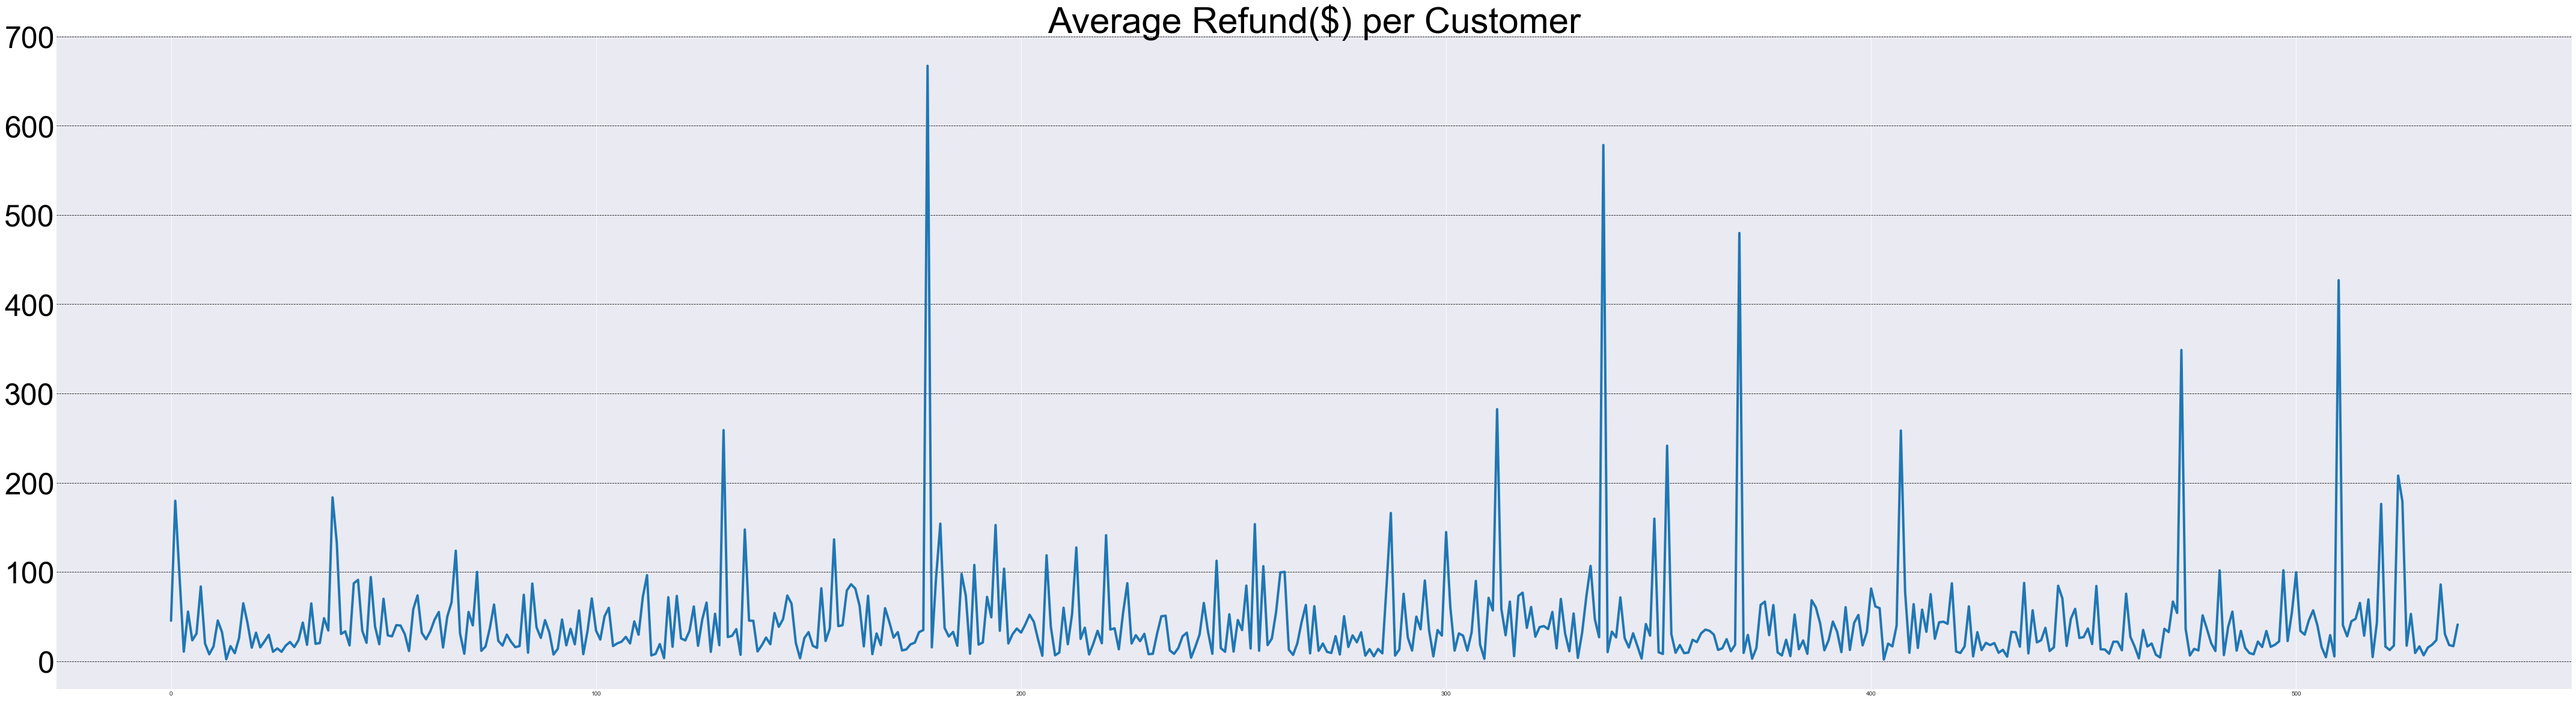

In [9]:
paymentSpread = meanPayPerPeep.plot.line(figsize=(75,20), lw=4, legend=False)
paymentSpread.set_title('Average Refund($) per Customer', fontsize=60, color='black')
paymentSpread.tick_params(axis='y', labelsize=50, colors='black')
paymentSpread.grid(axis='y', which='major', color='black', linestyle='--')

<font color=skyblue>Yeah, that looks nicer. A few spikes, probably some sports teams or something, but, generally it looks like the majority is all under a hundy. Still not the most readable, though. Kind of just looks like a graph of my sleep pattern. soooo, distributions? yeah, let's try that.</font>

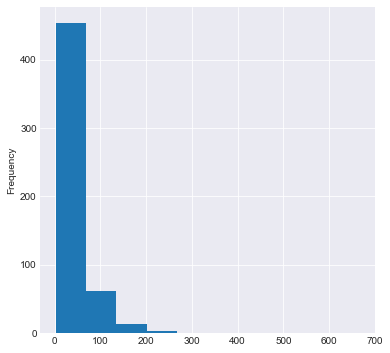

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
meanPayPerPeep['Payment Amount'].plot.hist(ax = ax)

<font color=skyblue>Oops, thats pretty ugly, and really just tells us the exact same thing. Let's limit that to under 200 bones since there really aren't that many higher.</font>

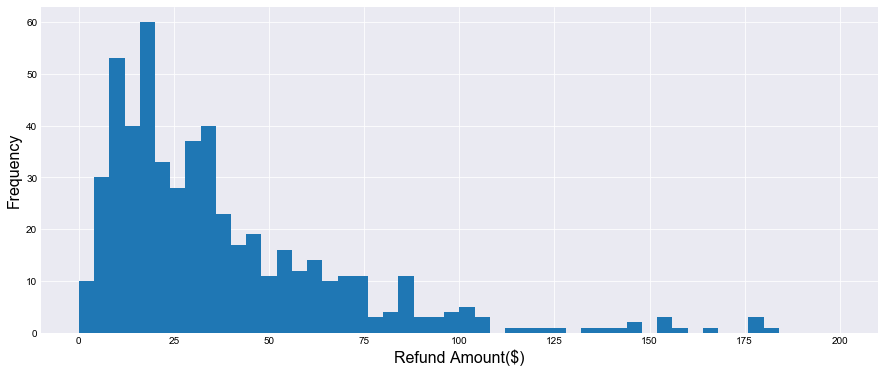

In [11]:
fig = plt.figure(figsize=(15,6))
ax = fig.gca()
meanPayPerPeep['Payment Amount'].plot.hist(ax = ax, bins=50, range=(0,200))
ax.set_xlabel('Refund Amount($)', fontsize=16, color='black')
ax.set_ylabel('Frequency', fontsize=16, color='black')
ax.tick_params(axis='both', colors='black')

<font color=skyblue>Ahhhhh, there we go. That is exactly what I'm looking for! Here we can see that 15-40 bucks is what a normal dropper would bring in. Around the 50 dollar mark the frequency really starts to drop off. Actually, it seems like this is very similar to orders coming in through the front of the depot. I'd have to do some checking into it, but I think that our average order size through the front is around 21 bucks.
<br>And just for fun, let's break that out into discrete packages.
</font>

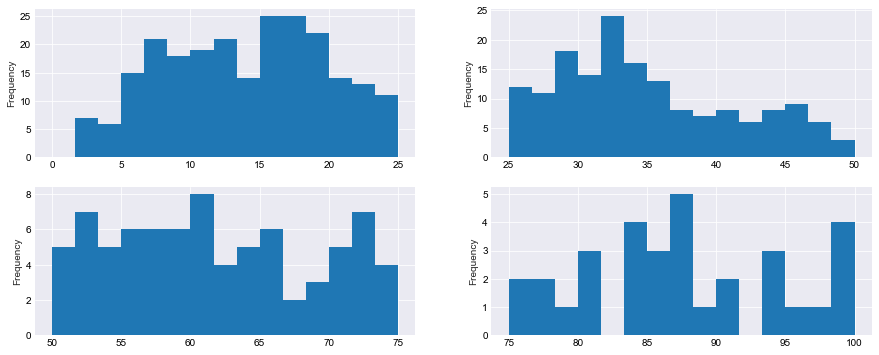

In [12]:
fig = plt.figure(1, figsize=(15,6))
ax = fig.gca()

plt.subplot(221)
meanPayPerPeep['Payment Amount'].plot.hist(bins=15, range=(0,25))
plt.gca().tick_params(axis='both', colors='black')
plt.subplot(222)
meanPayPerPeep['Payment Amount'].plot.hist(bins=15, range=(25,50))
plt.gca().tick_params(axis='both', colors='black')
plt.subplot(223)
meanPayPerPeep['Payment Amount'].plot.hist(bins=15, range=(50, 75))
plt.gca().tick_params(axis='both', colors='black')
plt.subplot(224)
meanPayPerPeep['Payment Amount'].plot.hist(bins=15, range=(75,100))
plt.gca().tick_params(axis='both', colors='black')

<font color=skyblue>Same business as the previous graph, frequency of refund amounts, but broken up into 25 dollar packs. Nothing that we didn't already know, but just a bit more detailed. The two most frequent payments we made were ~17 and ~33. Neat.</font>

<font color=skyblue>And remember we are using each customers average refund here. But to make sure that we didn't skew our data by doing so, let's compare every refund paid out to every customers average refund.</font>

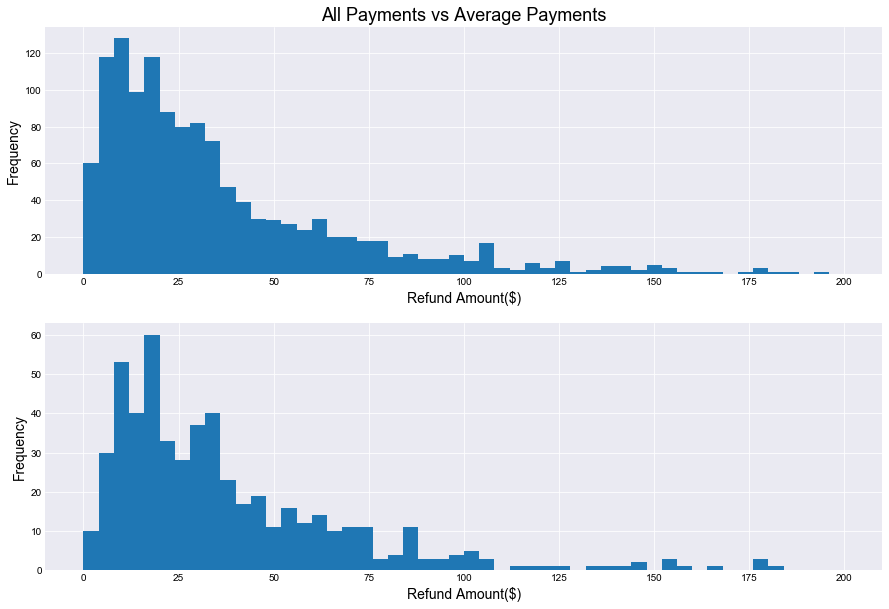

In [13]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

plt.subplot(211)
plt.title('All Payments vs Average Payments', fontsize=18, color='black')
df['Payment Amount'].plot.hist(bins=50, range=(0,200))
plt.gca().set_xlabel('Refund Amount($)', fontsize=14, color='black')
plt.gca().set_ylabel('Frequency', fontsize=14, color='black')
plt.gca().tick_params(axis='both', colors='black')

plt.subplot(212)
meanPayPerPeep['Payment Amount'].plot.hist(bins=50, range=(0,200))
plt.gca().set_xlabel('Refund Amount($)', fontsize=14, color='black')
plt.gca().set_ylabel('Frequency', fontsize=14, color='black')
plt.gca().tick_params(axis='both', colors='black')


<font color=skyblue>Yeah, so we fill in a few gaps if we look at every payment, but they still have nearly identical shapes. Good, good. I think we got some decent info for the money part, so let's move on.</font>

## Summary
***
#### Money, money, money...MONEEY!
***
__How much stuff do typical Droppers drop:__ about \$20 - \$30
<br>
<br>
__Is the Ding a popular option for large orders?__ Not really. over 75% of orders were less than 50 beans
<br>
<br>
__Are Dropped orders different from 'through the front' orders?__ Surprisingly, no. Maybe dng orders are slightly larger on average (the mean payment was \$40 which is higher that ttf, however, it is a smaller sample size with large orders that throw that off), but the most common orders seem to be on par.

## Shiny Happy People
***
#### Who *are* these people!?!

So now let's check out the people side of things. How often are people coming in and such and what-not. Like I said before, I wanted to find out how many people were *actual* Droppers. How many people actually converted into Droppers? But other stuff too, like how often are they coming in? How do the payments match up to these frequent droppers? Did they sign up online or in-store and does that correlate to how often they use it? It's gonna be a lot like how we did the payment stuff, but unfortunately, for some stuff we are going to have to use... (*gasp!*) __Math!__
<br>
<br> 
Just a quick note: It's really impossible to know whether or not someone has fully converted because we have no real way of telling if the person still brings stuff through the front from time to time. Soooo, I made an assumption. let's say that most people recycle once a month-ish. On the low end: about 8 times a year, high end: over 12+. Split the diff and let's say that anyone dropping off at least 10 times in the year has been converted. (Halelujah!!) They are a full-on dropper. Less than 10, well, infer at your own will. 6 drops a year might be just a casual recycler who doesn't make it in as often, ooorrr, they might be only dropping when the front is too busy or something. Less than 6? who knows. 
<br>
<br> 
Anywho, enough of that. On to the real stuff.


<font color=skyblue>Ok. So we already have a data frame of all the dng transactions that happened in the past year. But what we want is a data frame with each unique customer. We also want to see how many times they came in, so let's do that.</font>

In [14]:
df['Visits'] = df.groupby('Account Name')['Account Name'].transform('count')
td = df.groupby('Account Name')[['Account Number','Payment Amount', 'Visits']].mean().sort_values('Visits', ascending=False)
td

,Account Number,Payment Amount,Visits
Account Name,,,
Lisa MacMurchy,999000956.0,87.279722,36.0
Revival Music,999003100.0,85.120000,25.0
colin brass,999001352.0,17.618235,17.0
Robert Eering,999000246.0,26.288824,17.0
Lynda Bowman,999001402.0,7.760000,13.0
Mason Foote,96100500.0,3.773077,13.0
Regina Food,999001782.0,8.666154,13.0
Sandy Holfeld,999002463.0,89.843333,12.0
Colin Beaton,999000269.0,40.005833,12.0


In [15]:
totalCustomers = td['Account Number'].count()

<font color=skyblue>Now we can see how many times each Dropper dropped. Excellent. Also, we get to see that we had 539 people use the Ding. So, how many of those 539 were repeat offenders?</font>

In [16]:
repeaters = td['Visits'] > 1
repeaters = td['Visits'][repeaters].count()
repeatPercent = ((repeaters/td['Visits'].count())*100).round(2)
print(str(repeaters) + ' people used the ding more than once, which is ' + str(repeatPercent) + '%.')

229 people used the ding more than once, which is 42.49%.


<font color=skyblue>That is actually pretty good. That means that the Bounce Rate is only 57%. While that might sound high, that is really good. Really that means that nearly *half* of the people who try the Ding, keep using it. At least once, anyway. So, what about our loyal legion? The 10-&-over-club.</font>

In [17]:
droppers = td['Visits'] >= 10
droppers = td['Visits'][droppers].count()
dropperPercent = ((droppers/td['Visits'].count())*100).round(2)
print(str(droppers) + ' people used the Ding at least 10 times for ' + str(dropperPercent) + '%.')

14 people used the Ding at least 10 times for 2.6%.


<font color=skyblue>Not to shabby. In the first year (with active advertising, anyway) ~3% of our account holders are like, full blown Droppers! If we wanted to pad that number, we could drop our annual visit number to 8 (which isn't too far fetched. That's a visit every 6 weeks)</font>

In [18]:
droppers = td['Visits'] >= 8
droppers = td['Visits'][droppers].count()
dropperPercent = ((droppers/td['Visits'].count())*100).round(2)
print(str(droppers) + ' people used the Ding at least 8 times for ' + str(dropperPercent) + '%.')

21 people used the Ding at least 8 times for 3.9%.


<font color=skyblue>Like I said, infer what you will from these numbers. I think it's pretty good. And we could keep doing this for each number of visits, but thats a bit ridic. 
<br>
<br>
Instead, let's just take a look at the distribution of all visits.</font>

In [19]:
dropRate = td['Visits'].value_counts().reset_index()
dropRate.rename(columns={'index': 'Visits', 'Visits': 'Customers'}, inplace=True)
dropRate['Rate'] = ((dropRate['Customers'] / totalCustomers) * 100).round(2)
dropRate.sort_values('Visits')
# dropRate.sort_values(['Visits'], ascending=False)

,Visits,Customers,Rate
0,1.0,310,57.51
1,2.0,84,15.58
2,3.0,49,9.09
3,4.0,27,5.01
4,5.0,19,3.53
5,6.0,15,2.78
6,7.0,14,2.60
7,8.0,4,0.74
8,9.0,3,0.56
9,10.0,3,0.56


<font color=skyblue>Show a cool little graph for the amount of customers...</font>

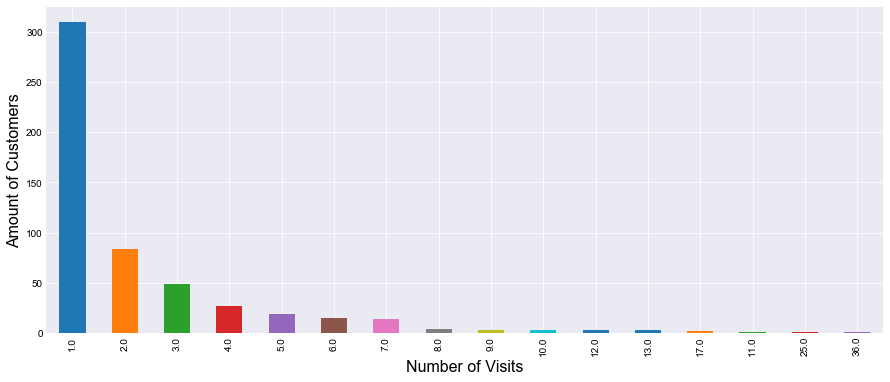

In [20]:
dropRate.plot.bar(figsize=(15,6), x='Visits', y='Customers', legend=False)
plt.gca().set_xlabel('Number of Visits', fontsize=16, color='black')
plt.gca().set_ylabel('Amount of Customers', fontsize=16, color='black')
plt.gca().tick_params(axis='both', colors='black')


<font color=skyblue>...And one for the percentage:</font>

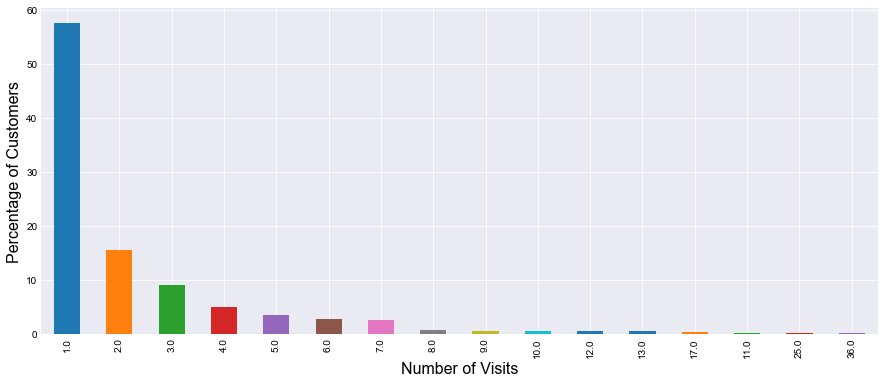

In [21]:
dropRate.plot.bar(figsize=(15,6), x='Visits', y='Rate', legend=False)
plt.gca().set_xlabel('Number of Visits', fontsize=16, color='black')
plt.gca().set_ylabel('Percentage of Customers', fontsize=16, color='black')
plt.gca().tick_params(axis='both', colors='black')

<font color=skyblue>Okie Dokie, smokie. Honestly, I think that is pretty darn good for the first year. I think it was probably expected to see a large Bounce Rate, with the Ding being a brand new thing and all. I'm sure it took a while for Bottle Drives to catch on, now we are doing 4 or so a week. Also, to keep in mind: Some of those repeat droppers, say someone who only has like 4 drops so far may have only just signed up a couple months ago.
<br>
anyways, on with the show. Let's take a look at our top ten:
</font>

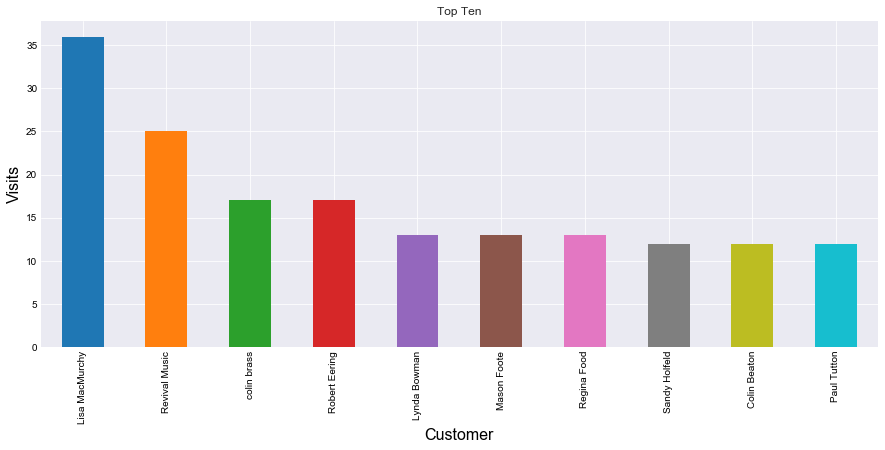

In [22]:
topTen = td[:10].plot.bar(figsize=(15,6), y='Visits', title='Top Ten', legend=False)
topTen.set_xlabel('Customer', fontsize=16, color='black')
topTen.set_ylabel('Visits', fontsize=16, color='black')
topTen.tick_params(axis='both', colors='black')

<font color=skyblue>Look at them beautiful people! If I knew who these people actually were, I'd give em all hi-fives. also, if you notice, 7 out of those 10 are just regular people. ('Lisa' is actually from a coffee shop) So, the people using the Ding are just regular recycling folks. Maybe that will change in the future with Group accounts.
<br>
<br>
Ok, so what next? How bout checking out if there is a correlation between *payment amount* and *visits*...
</font>

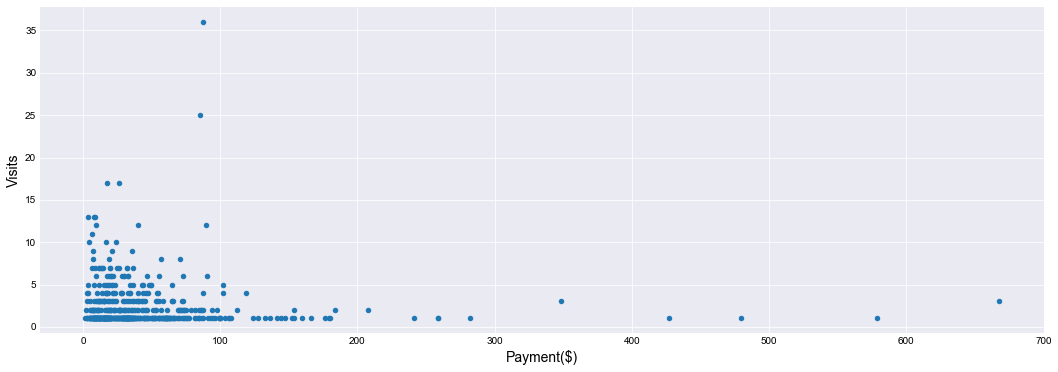

In [23]:
payVSVisits = td.plot(figsize=(18,6), kind='scatter', x='Payment Amount', y='Visits')
payVSVisits.set_xlabel('Payment($)', fontsize=14, color='black')
payVSVisits.set_ylabel('Visits', fontsize=14, color='black')
payVSVisits.tick_params(axis='both', colors='black')

<font color=skyblue>Hahaha, well. Nope. I suppose that it looks like all the big big ones are not very frequent flyers. Buuut, that is about it.
<br>
Ok, let's just check out one last thing: Online vs In-store Sign up.
</font>

In [24]:
import numpy as np
td['Sign-up'] = np.where(td['Account Number']>=999000000, 'Online', 'In-Store')
td

,Account Number,Payment Amount,Visits,Sign-up
Account Name,,,,
Lisa MacMurchy,999000956.0,87.279722,36.0,Online
Revival Music,999003100.0,85.120000,25.0,Online
colin brass,999001352.0,17.618235,17.0,Online
Robert Eering,999000246.0,26.288824,17.0,Online
Lynda Bowman,999001402.0,7.760000,13.0,Online
Mason Foote,96100500.0,3.773077,13.0,In-Store
Regina Food,999001782.0,8.666154,13.0,Online
Sandy Holfeld,999002463.0,89.843333,12.0,Online
Colin Beaton,999000269.0,40.005833,12.0,Online


<font color=skyblue>Depot:</font>

In [25]:
online = td.loc[td['Sign-up'] == 'Online']
inStore = td.loc[td['Sign-up'] == 'In-Store']
inStoreCount = inStore['Sign-up'].count()
inStorePercent = ((inStoreCount/totalCustomers)*100).round(2)
print(str(inStoreCount) + ' People (or ' + str(inStorePercent) + '%) signed up in the Depot')

245 People (or 45.45%) signed up in the Depot


<font color=skyblue>On that there internet:</font>

In [26]:
onlineCount = online['Sign-up'].count()
onlinePercent = ((onlineCount/totalCustomers)*100).round(2)
print(str(onlineCount) + ' People (or ' + str(onlinePercent) + '%) signed up on the website')

294 People (or 54.55%) signed up on the website


<font color=skyblue>That's a pretty even split. So I don't think this is going to yeild much, but, what the hell. Do people who signed up online bring in more or more often? Stay tuned! We'll find just right after a word from our sponsor:</font>

<img src=squirrel-eating-peanuts.jpg>

<font color=skyblue>Ha ha ha. That's good fun.
<br>
<br>
Now, back to it. Let's check out the stats for the different sign-ups.</font>

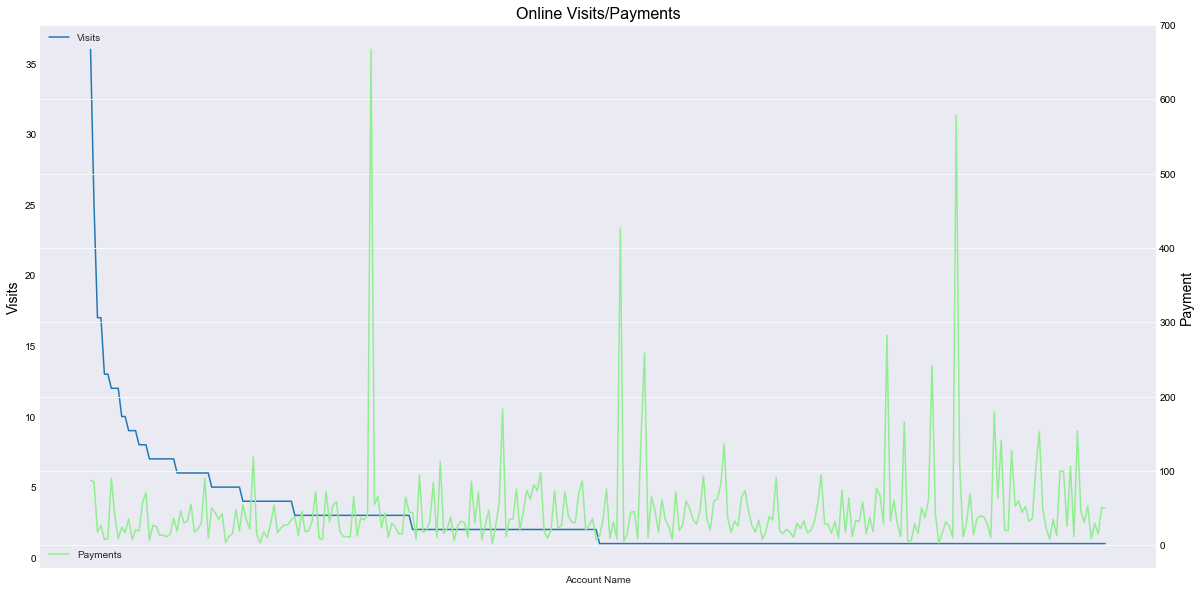

In [27]:
ax = online['Visits'].plot(figsize=(20,10), y='Visits')
ax.set_title('Online Visits/Payments', fontsize=16, color='black')
ax.set_ylabel('Visits', fontsize=14, color='black')
ax.tick_params(axis='both', colors='black')
online['Payment Amount'].plot(secondary_y=True, ax=ax, color='lightgreen');
plt.ylabel('Payment', fontsize=14, color='black')
plt.tick_params(axis='both', colors='black')
plt.xlabel('Online', fontsize=14, color='black')
ax.legend(['Visits'], loc=2)
plt.legend(['Payments'], loc=3)

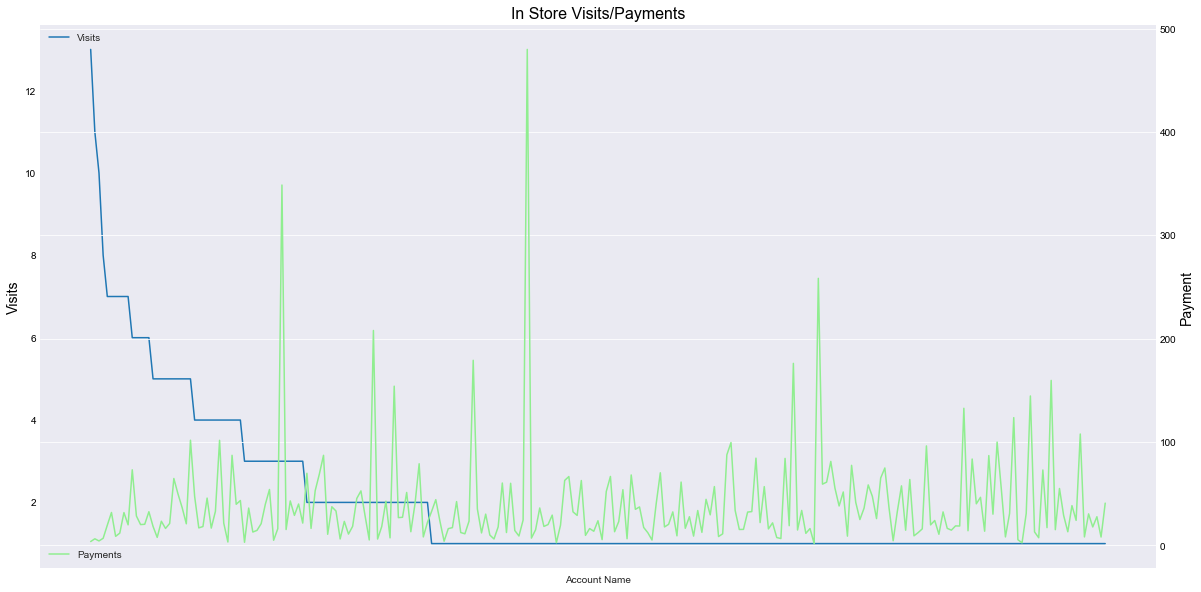

In [28]:
ax = inStore['Visits'].plot(figsize=(20,10), y='Visits')
ax.set_title('In Store Visits/Payments', fontsize=16, color='black')
ax.set_ylabel('Visits', fontsize=14, color='black')
ax.tick_params(axis='both', colors='black')
inStore['Payment Amount'].plot(secondary_y=True, ax=ax, color='lightgreen');
plt.ylabel('Payment', fontsize=14, color='black')
plt.tick_params(axis='both', colors='black')
plt.xlabel('Online', fontsize=14, color='black')
ax.legend(['Visits'], loc=2)
plt.legend(['Payments'], loc=3)

<font color=skyblue>So, it looks like the internet people come a little more often and bring a little bit more. <br>
<br>
Let's see the Visits side by side</font>

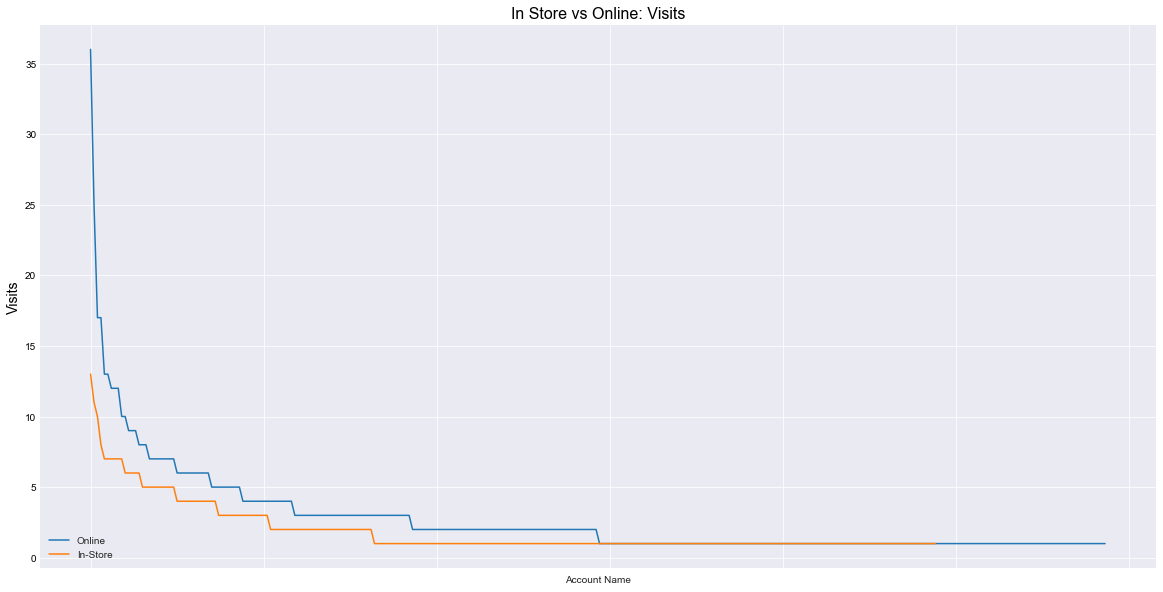

In [29]:
ax = online['Visits'].plot(figsize=(20,10), y='Visits')
ax.set_title('In Store vs Online: Visits', fontsize=16, color='black')
ax.set_ylabel('Visits', fontsize=14, color='black')
ax.tick_params(axis='both', colors='black')
inStore['Visits'].plot(ax=ax)

plt.tick_params(axis='both', colors='black')
ax.legend(['Online', 'In-Store'], loc=3)


<font color=skyblue>And the Payments:</font>

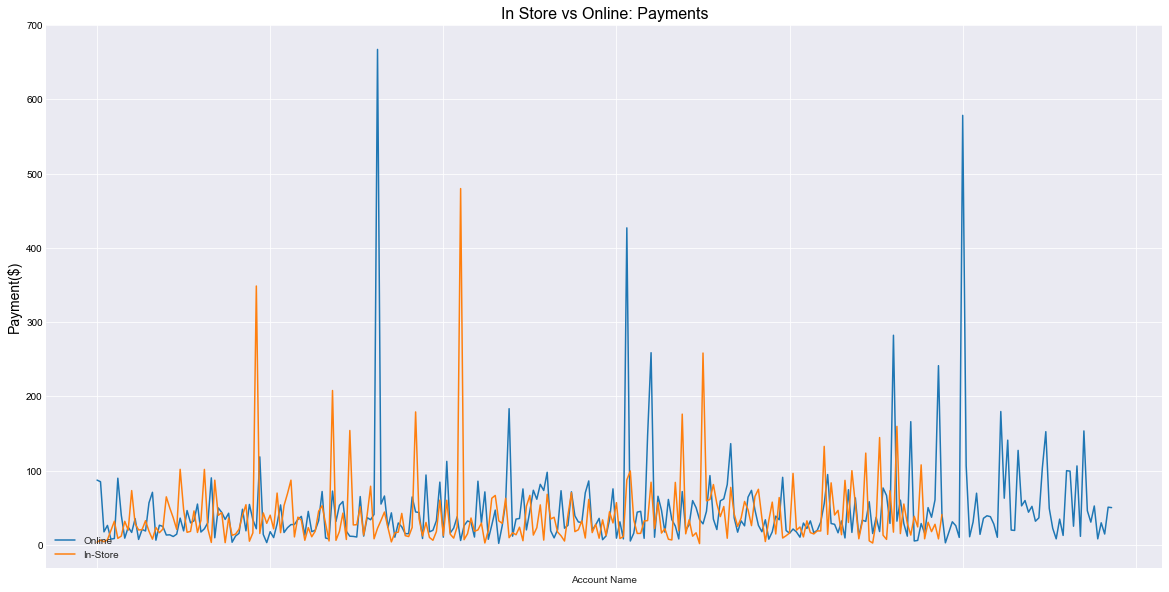

In [30]:
ax = online['Payment Amount'].plot(figsize=(20,10), y='Visits')
ax.set_title('In Store vs Online: Payments', fontsize=16, color='black')
ax.set_ylabel('Payment($)', fontsize=14, color='black')
ax.tick_params(axis='both', colors='black')
inStore['Payment Amount'].plot(ax=ax)

plt.tick_params(axis='both', colors='black')
ax.legend(['Online', 'In-Store'], loc=3)


<font color=skyblue>Woof, that is messy. ok, let's try just doing the average payments for each.</font>

In [31]:
onlineAverage = online['Payment Amount'].mean()
inStoreAverage = inStore['Payment Amount'].mean()
print('Online sign up average payment was: ' + str(onlineAverage) + '. And the In Store average was: ' + str(inStoreAverage))

Online sign up average payment was: 47.30658760653223. And the In Store average was: 39.89247439295398


<font color=skyblue>Ok, so virtually the same. But the visits were a little more seperated. It looks like our online sign-ups come in more often. Not a ton of information, but, oh well, its still kind of neat to see. So let's see one last thing. *(I think I said that before)*<br><br>Exact same thing as we did before (figuring out how many times people used the Ding) except this time, broken up by Online sign-ups and In-Store sign-ups. First up: Online.</font>

In [32]:
onlineRate = online['Visits'].value_counts().reset_index()
onlineRate.rename(columns={'index': 'Visits', 'Visits': 'Customers'}, inplace=True)
onlineRate['Rate'] = ((onlineRate['Customers'] / totalCustomers) * 100).round(2)
onlineRate.sort_values('Visits')

,Visits,Customers,Rate
0,1.0,147,27.27
1,2.0,54,10.02
2,3.0,34,6.31
3,4.0,15,2.78
5,5.0,9,1.67
4,6.0,10,1.86
6,7.0,8,1.48
7,8.0,3,0.56
8,9.0,3,0.56
10,10.0,2,0.37


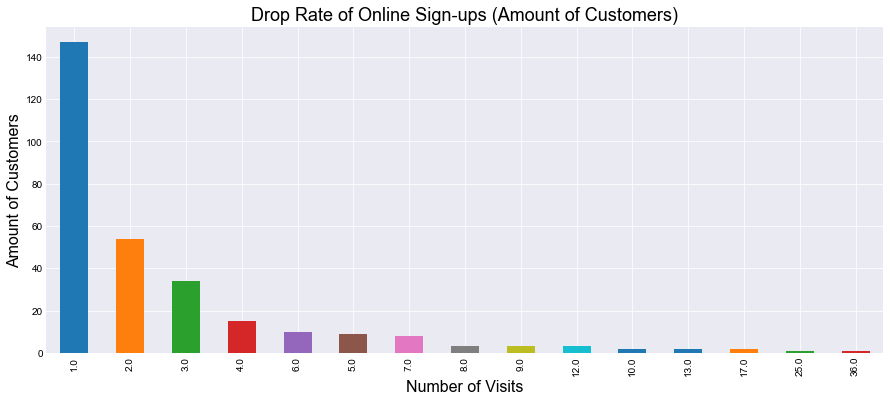

In [33]:
onlineRate.plot.bar(figsize=(15,6), x='Visits', y='Customers', legend=False)
plt.gca().set_title('Drop Rate of Online Sign-ups (Amount of Customers)', fontsize=18, color='black')
plt.gca().set_xlabel('Number of Visits', fontsize=16, color='black')
plt.gca().set_ylabel('Amount of Customers', fontsize=16, color='black')
plt.gca().tick_params(axis='both', colors='black')

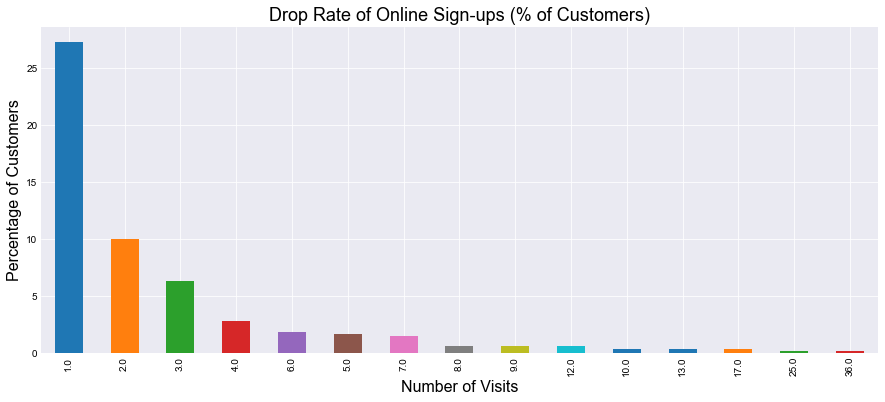

In [34]:
onlineRate.plot.bar(figsize=(15,6), x='Visits', y='Rate', legend=False)
plt.gca().set_title('Drop Rate of Online Sign-ups (% of Customers)', fontsize=18, color='black')
plt.gca().set_xlabel('Number of Visits', fontsize=16, color='black')
plt.gca().set_ylabel('Percentage of Customers', fontsize=16, color='black')
plt.gca().tick_params(axis='both', colors='black')

<font color=skyblue>And now for the Depot signer-uppers.</font>

In [35]:
inStoreRate = inStore['Visits'].value_counts().reset_index()
inStoreRate.rename(columns={'index': 'Visits', 'Visits': 'Customers'}, inplace=True)
inStoreRate['Rate'] = ((inStoreRate['Customers'] / totalCustomers) * 100).round(2)
inStoreRate.sort_values('Visits')

,Visits,Customers,Rate
0,1.0,163,30.24
1,2.0,30,5.57
2,3.0,15,2.78
3,4.0,12,2.23
4,5.0,10,1.86
6,6.0,5,0.93
5,7.0,6,1.11
7,8.0,1,0.19
8,10.0,1,0.19
9,11.0,1,0.19


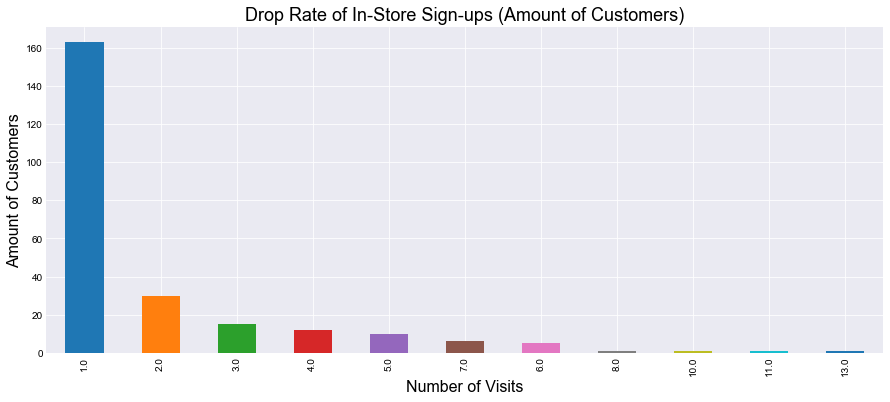

In [36]:
inStoreRate.plot.bar(figsize=(15,6), x='Visits', y='Customers', legend=False)
plt.gca().set_title('Drop Rate of In-Store Sign-ups (Amount of Customers)', fontsize=18, color='black')
plt.gca().set_xlabel('Number of Visits', fontsize=16, color='black')
plt.gca().set_ylabel('Amount of Customers', fontsize=16, color='black')
plt.gca().tick_params(axis='both', colors='black')

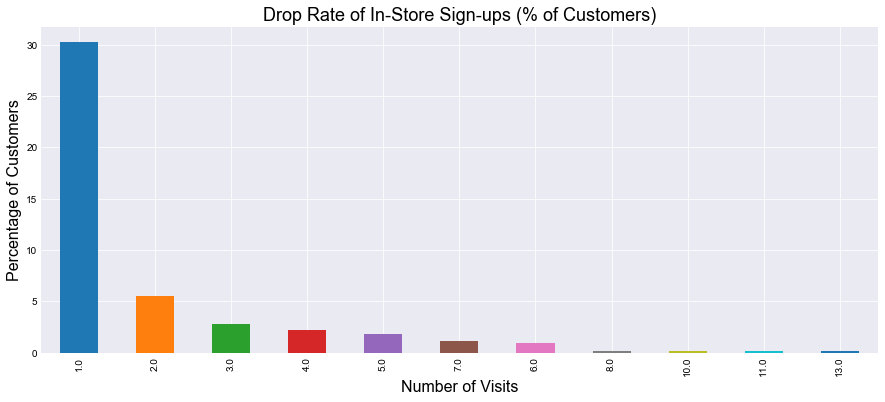

In [37]:
inStoreRate.plot.bar(figsize=(15,6), x='Visits', y='Rate', legend=False)
plt.gca().set_title('Drop Rate of In-Store Sign-ups (% of Customers)', fontsize=18, color='black')
plt.gca().set_xlabel('Number of Visits', fontsize=16, color='black')
plt.gca().set_ylabel('Percentage of Customers', fontsize=16, color='black')
plt.gca().tick_params(axis='both', colors='black')

<font color=skyblue>Ok, there we got something.</font>

In [38]:
onlineBounce = online['Visits'] == 1
onlineBounce = online['Visits'][onlineBounce].count()
onlineBounceRate = ((onlineBounce/online['Visits'].count())*100).round(2)
onlineConversions = online['Visits'] >= 8
onlineConversions = online['Visits'][onlineConversions].count()
onlineConversionPercent = ((onlineConversions/online['Visits'].count())*100).round(2)
print(str(onlineConversions) + ' of the people who signed up online came back at least 8 times for a ' + str(onlineConversionPercent) + '% conversion rate. The Bounce Rate is ' + str(onlineBounceRate) + '%.')

17 of the people who signed up online came back at least 8 times for a 5.78% conversion rate. The Bounce Rate is 50.0%.


In [39]:
inStoreBounce = inStore['Visits'] == 1
inStoreBounce = inStore['Visits'][inStoreBounce].count()
inStoreBounceRate = ((inStoreBounce/inStore['Visits'].count())*100).round(2)
inStoreConversions = inStore['Visits'] >= 8
inStoreConversions = inStore['Visits'][inStoreConversions].count()
inStoreConversionsPercent = ((inStoreConversions/inStore['Visits'].count())*100).round(2)
print(str(inStoreConversions) + ' of the people who signed up online came back at least 8 times for a ' + str(inStoreConversionsPercent) + '% conversion rate. The Bounce Rate is ' + str(inStoreBounceRate) + '%.')

4 of the people who signed up online came back at least 8 times for a 1.63% conversion rate. The Bounce Rate is 66.53%.


<font color=skyblue>So, our online sign-ups tend to make the Ding their main method of Earth saving, whereas the people signing up in the depot give it a try aaaand, that's about it. Neat.</font>

## Summary
***
#### From the people. For the people.
***
__Overall Conversion Rate:__ ~ 3.2% (+/- .7%)<br>
__Overall Bounce Rate:__ 57%<br>

__Correlations between Payments and Visits?__ meh, not really. You could maybe say that higher payments are generally one time use, not recurring droppers.<br>

__Online Conversion Rate:__ 5.78%<br>
__Online Bounce Rate:__ 50%<br>

__In Store Conversion Rate:__ 1.63%<br>
__In Sotre Bounce Rate:__ 66.53%<br>

<font color=skyblue>Well, there we go. That was fun. There is a tonne of other stuff we could dive deeper into, like Datetimes and such and what not. It would be pretty cool to check this type of stuff out for the whole province, too, maybe we would get some cool regional patterns or differences between depot sizes. Maybe if I get bored some other day I'll check that out, but I think that's all for now.<br>
</font>